# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料

使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0716 15:34:10.835955 4519212480 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0716 15:34:10.838742 4519212480 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 15:34:10.868362 4519212480 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 15:34:10.869389 4519212480 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 15:34:10.874238 45

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8259 - acc: 0.3472 - val_loss: 1.6533 - val_acc: 0.4140
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5995 - acc: 0.4310 - val_loss: 1.5606 - val_acc: 0.4390
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5088 - acc: 0.4645 - val_loss: 1.6322 - val_acc: 0.4157
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.4476 - acc: 0.4877 - val_loss: 1.4739 - val_acc: 0.4721
Epoch 5/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.3993 - acc: 0.5017 - val_loss: 1.4869 - val_acc: 0.4696
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3575 - acc: 0.5178 - val_loss: 1.4980 - val_acc: 0.4765
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3241 - acc: 0.5261 - val_loss: 1.4021 -

Epoch 2/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.7822 - acc: 0.3725 - val_loss: 1.7360 - val_acc: 0.3908
Epoch 3/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7050 - acc: 0.4018 - val_loss: 1.6869 - val_acc: 0.4081
Epoch 4/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6491 - acc: 0.4218 - val_loss: 1.6361 - val_acc: 0.4221
Epoch 5/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6032 - acc: 0.4381 - val_loss: 1.5944 - val_acc: 0.4428
Epoch 6/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.5659 - acc: 0.4487 - val_loss: 1.5579 - val_acc: 0.4552
Epoch 7/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.5332 - acc: 0.4635 - val_loss: 1.5442 - val_acc: 0.4606
Epoch 8/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.5042 - acc: 0.4720 - val_loss: 1.5181 - val_acc: 0.4611
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.0436 - acc: 0.2855 - val_loss: 2.0101 - val_acc: 0.2978
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.9848 - acc: 0.3052 - val_loss: 1.9615 - val_acc: 0.3158
Epoch 5/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.9421 - acc: 0.3200 - val_loss: 1.9257 - val_acc: 0.3243
Epoch 6/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.9102 - acc: 0.3309 - val_loss: 1.8972 - val_acc: 0.3347
Epoch 7/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.8842 - acc: 0.3429 - val_loss: 1.8757 - val_acc: 0.3429
Epoch 8/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.8633 - acc: 0.3489 - val_loss: 1.8575 - val_acc: 0.3534
Epoch 9/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.8455 - acc: 0.3571 - val_loss: 1.8393 - val_acc: 0.3579
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.2253 - acc: 0.1818 - val_loss: 2.2153 - val_acc: 0.1903
Epoch 5/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.2058 - acc: 0.1979 - val_loss: 2.1974 - val_acc: 0.2029
Epoch 6/50
50000/50000 [==============================] - 13s 257us/step - loss: 2.1888 - acc: 0.2097 - val_loss: 2.1815 - val_acc: 0.2115
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.1735 - acc: 0.2182 - val_loss: 2.1670 - val_acc: 0.2224
Epoch 8/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.1593 - acc: 0.2277 - val_loss: 2.1535 - val_acc: 0.2315
Epoch 9/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.1461 - acc: 0.2352 - val_loss: 2.1410 - val_acc: 0.2394
Epoch 10/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.1338 - acc: 0.2416 - val_loss: 2.1293 - val_acc: 0.2445
Epoch 11/50
50000/50000 [=

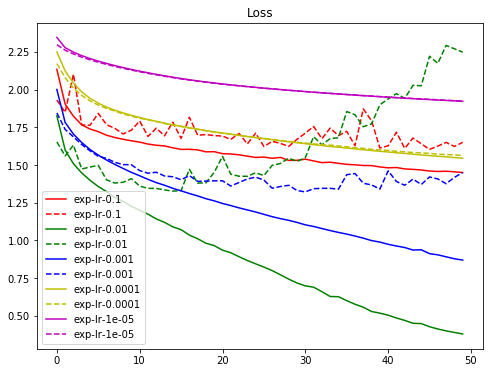

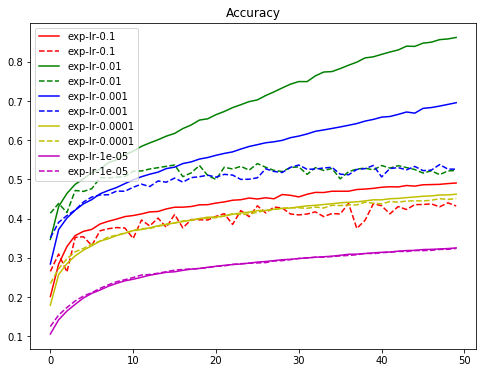

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()